In [25]:
import gzip
import shutil
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import zipfile
import os
from PIL import Image


from tensorflow import keras
# Asegurar que las etiquetas están en formato correcto
from keras.utils import to_categorical

In [26]:
!wget https://github.com/IJozk/DeepL/raw/47d6cf85f088848a81ded43f640de39d25466dab/red_adamv1_3.h5
!wget https://github.com/IJozk/DeepL/raw/47d6cf85f088848a81ded43f640de39d25466dab/pesos_red_adamv1_3.weights.h5
!wget https://github.com/IJozk/DeepL/raw/47d6cf85f088848a81ded43f640de39d25466dab/pesos_red_neuronal_sgd.weights.h5
!wget https://github.com/IJozk/DeepL/raw/47d6cf85f088848a81ded43f640de39d25466dab/red_neuronal_sgd.h5

--2025-04-21 05:01:59--  https://github.com/IJozk/DeepL/raw/47d6cf85f088848a81ded43f640de39d25466dab/red_adamv1_3.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IJozk/DeepL/47d6cf85f088848a81ded43f640de39d25466dab/red_adamv1_3.h5 [following]
--2025-04-21 05:02:00--  https://raw.githubusercontent.com/IJozk/DeepL/47d6cf85f088848a81ded43f640de39d25466dab/red_adamv1_3.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6848232 (6.5M) [application/octet-stream]
Saving to: ‘red_adamv1_3.h5.1’

red_adamv1_3.h5.1   100%[===================>]   6.53M  --.-KB/s    in 0.06s   

2025-04-21 05:02:00 (115 

In [27]:
!wget https://github.com/lucaspg04/numerosDL/raw/c79f4233d36ebd7f6086294dc845a21e3abaaf0e/numeros1.zip


--2025-04-21 05:02:02--  https://github.com/lucaspg04/numerosDL/raw/c79f4233d36ebd7f6086294dc845a21e3abaaf0e/numeros1.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucaspg04/numerosDL/c79f4233d36ebd7f6086294dc845a21e3abaaf0e/numeros1.zip [following]
--2025-04-21 05:02:03--  https://raw.githubusercontent.com/lucaspg04/numerosDL/c79f4233d36ebd7f6086294dc845a21e3abaaf0e/numeros1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16813 (16K) [application/zip]
Saving to: ‘numeros1.zip.1’

numeros1.zip.1      100%[===================>]  16.42K  --.-KB/s    in 0s      

2025-04-21 05:02:03 (40.6

In [28]:
!unzip -o numeros1.zip

Archive:  numeros1.zip
  inflating: numeros/0.0.png         
  inflating: numeros/0.png           
  inflating: numeros/1.1.png         
  inflating: numeros/1.png           
  inflating: numeros/2.2.png         
  inflating: numeros/2.png           
  inflating: numeros/3.3.png         
  inflating: numeros/3.png           
  inflating: numeros/4.4.png         
  inflating: numeros/4.png           
  inflating: numeros/5.5.png         
  inflating: numeros/5.png           
  inflating: numeros/6.6.png         
  inflating: numeros/6.png           
  inflating: numeros/7.7.png         
  inflating: numeros/7.png           
  inflating: numeros/8.8.png         
  inflating: numeros/8.png           
  inflating: numeros/9.9.png         
  inflating: numeros/9.png           


In [29]:
modelo_adam = keras.models.load_model("red_adamv1_3.h5")
modelo_adam.load_weights("pesos_red_adamv1_3.weights.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [30]:
modelo_sgd = keras.models.load_model("red_neuronal_sgd.h5")
modelo_sgd.load_weights("pesos_red_neuronal_sgd.weights.h5")

In [31]:
ruta_imagenes = "numeros"
archivos_png = sorted([f for f in os.listdir(ruta_imagenes) if f.endswith(".png")])

# Cargar imágenes (usando todos los archivos en el zip)
X_subset = []
for archivo in archivos_png[:22]:  # Usar los 22 archivos
    ruta = os.path.join(ruta_imagenes, archivo)
    imagen = Image.open(ruta).convert("L")
    array = np.array(imagen).reshape(28 * 28).astype("float32") / 255.0
    X_subset.append(array)

X_subset = np.array(X_subset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


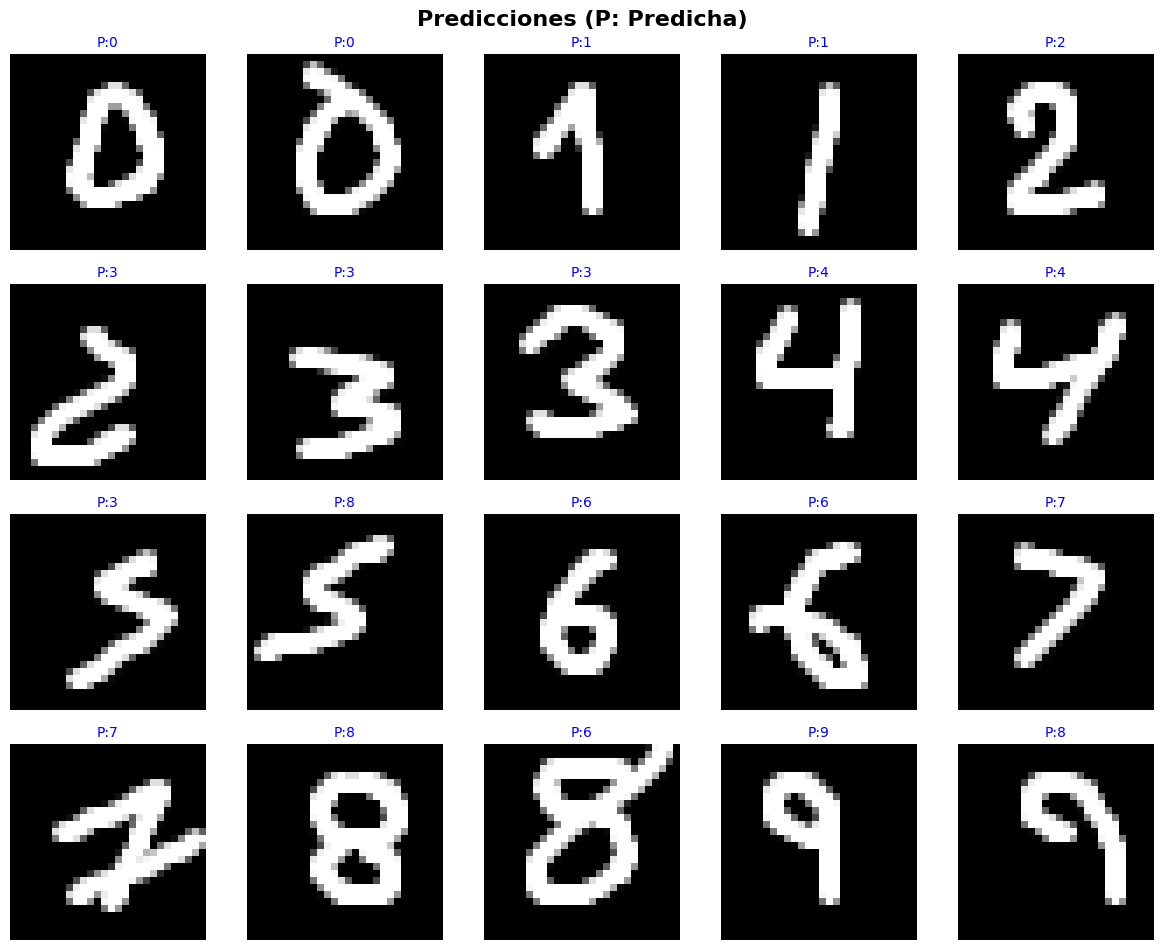

In [32]:
predicciones = modelo_adam.predict(X_subset)
clases_predichas = np.argmax(predicciones, axis=1)

# Mostrar resultados
plt.figure(figsize=(12, 12))  # Ajustado para más imágenes
for i in range(len(X_subset)):
    plt.subplot(5, 5, i + 1)  # Cambié a 5 filas, 5 columnas para ajustar el espacio
    plt.imshow(X_subset[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"P:{clases_predichas[i]}", color="blue", fontsize=10)
plt.suptitle("Predicciones (P: Predicha)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


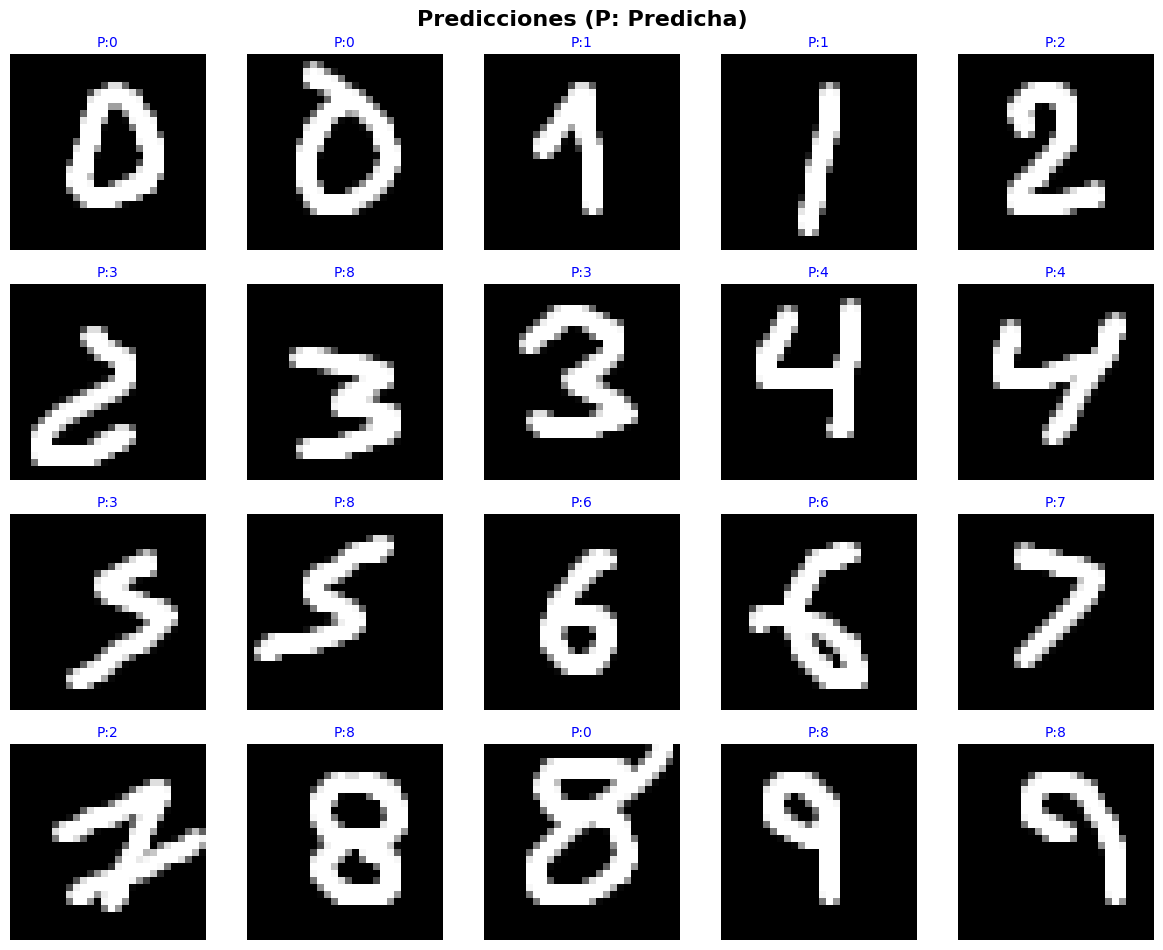

In [34]:
predicciones = modelo_sgd.predict(X_subset)
clases_predichas = np.argmax(predicciones, axis=1)

# Mostrar resultados
plt.figure(figsize=(12, 12))  # Ajustado para más imágenes
for i in range(len(X_subset)):
    plt.subplot(5, 5, i + 1)  # Cambié a 5 filas, 5 columnas para ajustar el espacio
    plt.imshow(X_subset[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"P:{clases_predichas[i]}", color="blue", fontsize=10)
plt.suptitle("Predicciones (P: Predicha)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()